# Analise e previsão das ações da amazon e petrobras (AMZN, PETR4.SA)

## importando bibliotecas

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import datetime as dt
import pandas_datareader.data as web

## escolhendo ações para análise 

In [12]:
dfAMZN = web.DataReader('AMZN', 'yahoo', start='2013-01-01', end='2021-12-31')

In [13]:
dfAMZN

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,258.100006,253.259995,256.079987,257.309998,3271000,257.309998
2013-01-03,260.880005,256.369995,257.269989,258.480011,2750900,258.480011
2013-01-04,259.799988,256.649994,257.579987,259.149994,1874200,259.149994
2013-01-07,269.730011,262.670013,262.970001,268.459991,4910000,268.459991
2013-01-08,268.980011,263.570007,267.070007,266.380005,3010700,266.380005
...,...,...,...,...,...,...
2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893
2021-12-28,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971
2021-12-29,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020


In [15]:
dfAMZN.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [18]:
# dfAMZN.isna().sum() e dfPETR4SA.isna().sum() analisa se existe algum valor que não represente um numero no dataframe 

## agora vamos focar em Adj close em novos data frames 

In [32]:
start = '2013-01-01'
end = '2021-12-31'
df = pd.DataFrame(DataReader('AMZN', data_source = 'yahoo',
               start = start, end = end)['Adj Close'])

In [38]:
df

,Adj Close
Date,
2013-01-02,257.309998
2013-01-03,258.480011
2013-01-04,259.149994
2013-01-07,268.459991
2013-01-08,266.380005
...,...
2021-12-27,3393.389893
2021-12-28,3413.219971
2021-12-29,3384.020020


In [36]:
start = '2013-01-01'
end = '2021-12-31'
df2 = pd.DataFrame(DataReader('PETR4.SA', data_source = 'yahoo',
               start = start, end = end)['Adj Close'])

In [39]:
df.describe()

,Adj Close
count,2267.000000
mean,1359.747327
std,1049.670594
min,248.229996
25%,398.000000
50%,967.989990
75%,1884.440002
max,3731.409912


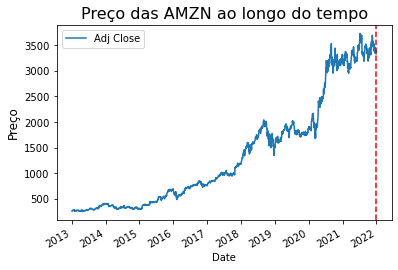

In [44]:
df.plot()
plt.title("Preço das AMZN ao longo do tempo", fontsize = 16)
plt.axvline('2022', linestyle = '--', color = 'r')
plt.ylabel('Preço', fontsize = 12);

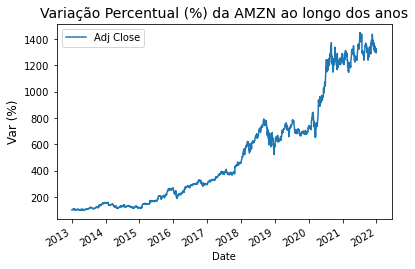

In [46]:
(df/df.iloc[0]*100).plot()
plt.title('Variação Percentual (%) da AMZN ao longo dos anos', fontsize = 14)
plt.ylabel('Var (%)', fontsize = 12);

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

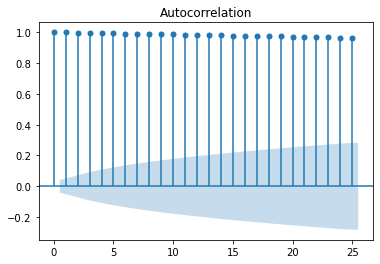

In [48]:
plot_acf(df, lags = 25);

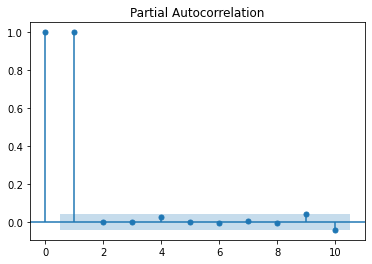

In [49]:
plot_pacf(df, lags = 10);

In [52]:
from statsmodels.tsa.stattools import adfuller



In [53]:
p1 = adfuller(df['Adj Close'])[1]
print('p-valor', p1)

if p1 < 0.05:
    print('É uma série estacionária')
else:
    print('É uma random walk')

p-valor 0.9921373591861151
É uma random walk


In [ ]:
# de acordo com o teste de adfuller a ação AMZN não é estacionaria logo devemos transforma-la utilizando diff

In [55]:
df_diff = df.diff().dropna()
df_diff.head()


,Adj Close
Date,
2013-01-03,1.170013
2013-01-04,0.669983
2013-01-07,9.309998
2013-01-08,-2.079987
2013-01-09,-0.029999


In [56]:
# a função diff faz a diferença da linha atual pela linha anterios 

In [57]:
df.iloc[1] - df.iloc[0]

Adj Close    1.170013
dtype: float64

Text(0.5, 1.0, 'AMZN transformado')

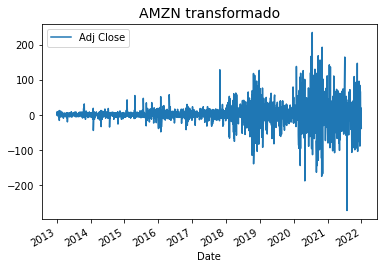

In [58]:
df_diff.plot();
plt.title('AMZN transformado', fontsize = 14)

In [59]:
p1 = adfuller(df_diff['Adj Close'])[1]
print('p-valor', p1)

if p1 < 0.05:
    print('É uma série estacionária')
else:
    print('É uma random walk')

p-valor 4.58651087328915e-20
É uma série estacionária


In [60]:
# reutilizando o teste adfuller após a transformação obtemos agora uma série estacionária 

## Agora como próximos passos podemos aplicar o AIC para definir qual será o melhor modelo a ser testado por esse dataset

In [61]:
from statsmodels.tsa.arima_model import ARMA

In [62]:
ls_ar, ls_ma, ls_aic, ls_bic = [], [], [], []

for ar in range(0, 4):
    for ma in range(0, 4):
        mod = ARMA(df_diff, order=(ar, ma))
        res = mod.fit()
        
        ls_ar.append(ar)
        ls_ma.append(ma)
        ls_aic.append(res.aic)
        ls_bic.append(res.bic)

C:\Users\dougl\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dougl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [63]:
df_ic = pd.DataFrame({'AR': ls_ar, 'MA': ls_ma,
                      'AIC': ls_aic, 'BIC': ls_bic})

In [64]:
df_ic.sort_values(['AIC','BIC'])

,AR,MA,AIC,BIC
15,3,3,22093.620376,22139.426547
3,0,3,22096.543269,22125.172126
12,3,0,22096.781180,22125.410037
7,1,3,22097.624935,22131.979564
13,3,1,22098.573393,22132.928022
11,2,3,22099.551607,22139.632007
14,3,2,22100.446613,22140.527014
5,1,1,22101.635172,22124.538257
10,2,2,22103.393442,22137.748070
9,2,1,22103.578481,22132.207338


In [65]:
df_diff_ma2 = ARMA(df_diff, order = (0,2))
result = df_diff_ma2.fit()
result.summary()

C:\Users\dougl\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dougl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2266
Model:                     ARMA(0, 2)   Log Likelihood              -11050.233
Method:                       css-mle   S.D. of innovations             31.741
Date:                Wed, 27 Apr 2022   AIC                          22108.466
Time:                        19:42:14   BIC                          22131.369
Sample:                             0   HQIC                         22116.823
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.3586      0.641      2.121      0.034       0.103       2.614
ma.L1.Adj Close    -0.0302      0.021     -1.425      0.154      -0.072       0.011
ma.L2.Adj Close    -0.0090      0.021     -0.427      0.669      -0.050       0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            9.0127           +0.0000j            9.0127            0.0000
MA.2          -12.3878           +0.0000j           12.3878            0.5000
-----------------------------------------------------------------------------
"""

In [66]:
df_diff.shape

(2266, 1)

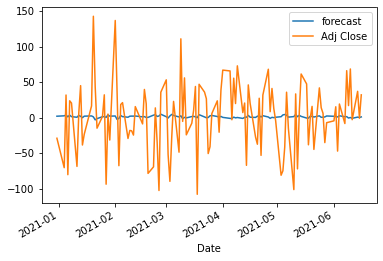

In [70]:
result.plot_predict(start = 2013, end = 2127)
plt.show()

Text(0.5, 1.0, 'AMZN Cumulative Returns')

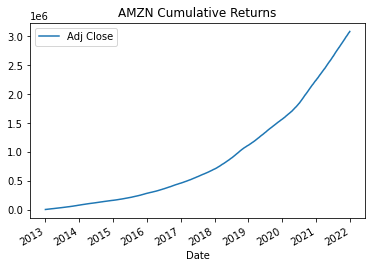

In [71]:
dr = df.cumsum()
dr.plot()
plt.title('AMZN Cumulative Returns')

In [73]:
from pandas.plotting import lag_plot

Text(0.5, 1.0, 'AMZN Autocorrelation plot')

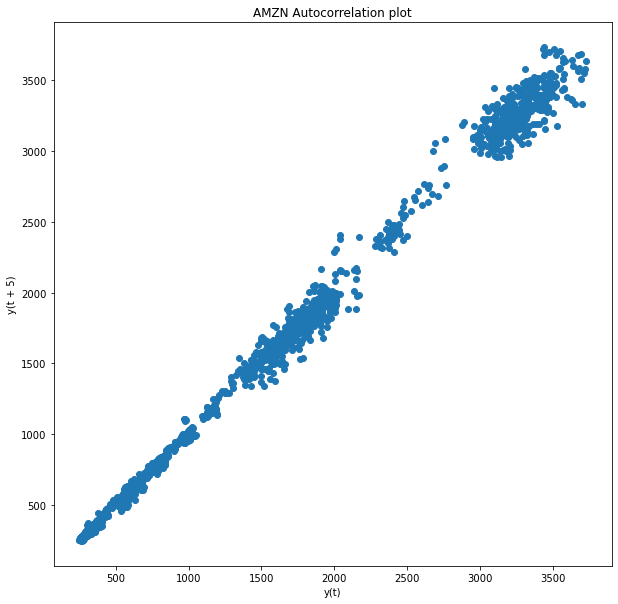

In [77]:
plt.figure(figsize=(10,10))
lag_plot(df, lag=5)
plt.title('AMZN Autocorrelation plot')